# Experimentación con KNN

## Carga de datos

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import pickle
def ft_ex(x, project_path):
    # Cargar features de entrenamiento o test
    with open(f'{project_path}/{x}_features_mel.pkl', 'rb') as file:
        mel = pickle.load(file)
    with open(f'{project_path}/{x}_features_chroma.pkl', 'rb') as file:
        chroma = pickle.load(file)
    with open(f'{project_path}/{x}_features_mfcc.pkl', 'rb') as file:
        mfcc = pickle.load(file)
    with open(f'{project_path}/{x}_features_spectral_contrast.pkl', 'rb') as file:
        spectral_contrast = pickle.load(file)
    with open(f'{project_path}/{x}_features_delta.pkl', 'rb') as file:
        delta = pickle.load(file)
    with open(f'{project_path}/{x}_features_delta2.pkl', 'rb') as file:
        delta2 = pickle.load(file)

    # Concatenar las features
    return mfcc, mel, chroma, spectral_contrast, delta, delta2

In [55]:
import os
project_path = '/content/drive/Shared drives/ML4/project-4-whale-calls'
train_mfcc, train_mel, train_chroma, train_spectral_contrast, train_delta, train_delta2 = ft_ex('train', project_path)
test_mfcc, test_mel, test_chroma, test_spectral_contrast, test_delta, test_delta2 = ft_ex('test', project_path)

## Transformación de datos

In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() # Encoder 0-1

y_train_labels = np.array(label_encoder.fit_transform(pd.read_csv(os.path.join(project_path, 'train.csv'))['class']))

# y_test_labels = np.array(label_encoder.transform(pd.read_csv(os.path.join(project_path, 'test.csv'))['class']))  # Si hubiera

In [6]:
def flatten(data):
  data_flat = []
  for i, feature in enumerate(data):
      temp_feature = []
      for local_feature in feature:
          temp_feature = np.concatenate((temp_feature, local_feature), axis=None)
      data_flat.append(temp_feature)

  return np.array(data_flat)

In [7]:
# Convertimos a np array
train_delta = np.array(train_delta)
train_delta2 = np.array(train_delta2)
test_delta = np.array(test_delta)
test_delta2 = np.array(test_delta2)

# aplanamos train
train_mfcc_flat = flatten(train_mfcc)
train_mel_flat = flatten(train_mel)
train_chroma_flat = flatten(train_chroma)
train_spectral_contrast_flat = flatten(train_spectral_contrast)
train_delta_flat = flatten(train_delta)
train_delta2_flat = flatten(train_delta2)

# aplanamos test
test_mfcc_flat = flatten(test_mfcc)
test_mel_flat = flatten(test_mel)
test_chroma_flat = flatten(test_chroma)
test_spectral_contrast_flat = flatten(test_spectral_contrast)
test_delta_flat = flatten(test_delta)
test_delta2_flat = flatten(test_delta2)

In [8]:
print("mfcc_train",train_mfcc_flat.shape)
print("mel_train",train_mel_flat.shape)
print("chroma_train",train_chroma_flat.shape)
print("spectral_contrast_train",train_spectral_contrast_flat.shape)
print("delta_train",train_delta_flat.shape)
print("delta2_train",train_delta2_flat.shape)

mfcc_train (10934, 1740)
mel_train (10934, 11136)
chroma_train (10934, 1044)
spectral_contrast_train (10934, 609)
delta_train (10934, 1740)
delta2_train (10934, 1740)


In [9]:
print("mfcc_test",test_mfcc_flat.shape)
print("mel_test",test_mel_flat.shape)
print("chroma_test",test_chroma_flat.shape)
print("spectral_contrast_test",test_spectral_contrast_flat.shape)
print("delta_test",test_delta_flat.shape)
print("delta2_test",test_delta2_flat.shape)

mfcc_test (1962, 1740)
mel_test (1962, 11136)
chroma_test (1962, 1044)
spectral_contrast_test (1962, 609)
delta_test (1962, 1740)
delta2_test (1962, 1740)


## Normalización de datos

In [10]:
# normalizamos
import sklearn
from sklearn.preprocessing import MinMaxScaler

# Create separate scalers for different features
scaler_mfcc = MinMaxScaler()
scaler_mel = MinMaxScaler()
scaler_chroma = MinMaxScaler()
scaler_spectral_contrast = MinMaxScaler()
scaler_delta = MinMaxScaler()
scaler_delta2 = MinMaxScaler()

#train
train_mfcc_sc = scaler_mfcc.fit_transform(train_mfcc_flat)
train_mel_sc = scaler_mel.fit_transform(train_mel_flat)
train_chroma_sc = scaler_chroma.fit_transform(train_chroma_flat)
train_spectral_contrast_sc = scaler_spectral_contrast.fit_transform(train_spectral_contrast_flat)
train_delta_sc = scaler_delta.fit_transform(train_delta_flat)
train_delta2_sc = scaler_delta2.fit_transform(train_delta2_flat)

#test
test_mfcc_sc = scaler_mfcc.transform(test_mfcc_flat)
test_mel_sc = scaler_mel.transform(test_mel_flat)
test_chroma_sc = scaler_chroma.transform(test_chroma_flat)
test_spectral_contrast_sc = scaler_spectral_contrast.transform(test_spectral_contrast_flat)
test_delta_sc = scaler_delta.transform(test_delta_flat)
test_delta2_sc = scaler_delta2.transform(test_delta2_flat)

## Reducción de la dimensionalidad con PCA

In [12]:
# Ya tenemos el archivo
from sklearn.decomposition import PCA
pca_c2 = PCA(203) # Debido a que el train se redujo a 203 features
test_c2_pca = pca_c2.fit_transform(test_mel_sc)

In [13]:
test_c2_pca.shape

(1962, 203)

In [14]:
train_c2_pca = np.load('/content/drive/Shared drives/ML4/project-4-whale-calls/train_c2_pca.npy')
print(train_c2_pca.shape)

(10934, 203)


In [15]:
import sklearn.decomposition
from sklearn.decomposition import PCA
pca_c1 = PCA(n_components=0.9)
pca_c3 = PCA(n_components=0.9)
pca_c4 = PCA(n_components=0.9)
pca_c5 = PCA(n_components=0.9)
pca_c6 = PCA(n_components=0.9)

#train
train_c1_pca = pca_c1.fit_transform(train_mfcc_sc)
# train_c2_pca = pca_c2.fit_transform(train_mel_sc) No porque lo cargamos desde npi y tarda mucho
train_c3_pca = pca_c3.fit_transform(train_chroma_sc)
train_c4_pca = pca_c4.fit_transform(train_spectral_contrast_sc)
train_c5_pca = pca_c5.fit_transform(train_delta_sc)
train_c6_pca = pca_c6.fit_transform(train_delta2_sc)

#test
test_c1_pca = pca_c1.transform(test_mfcc_sc)
test_c2_pca = pca_c2.transform(test_mel_sc)
test_c3_pca = pca_c3.transform(test_chroma_sc)
test_c4_pca = pca_c4.transform(test_spectral_contrast_sc)
test_c5_pca = pca_c5.transform(test_delta_sc)
test_c6_pca = pca_c6.transform(test_delta2_sc)

In [16]:
print(train_c1_pca.shape)
print(train_c2_pca.shape)

(10934, 103)
(10934, 203)


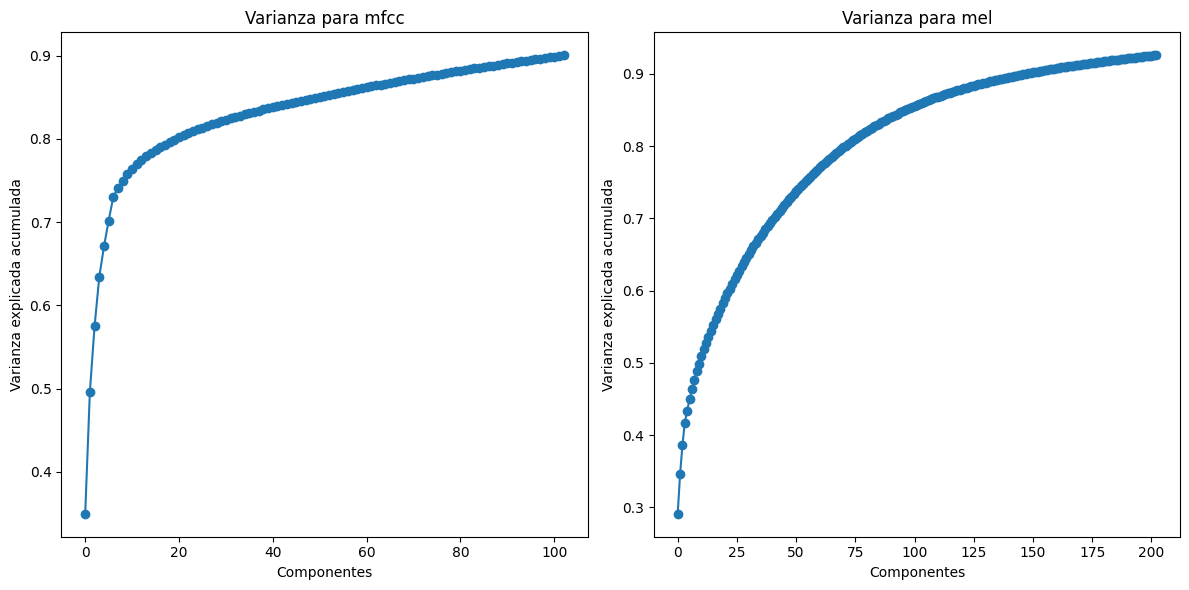

In [50]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.cumsum(pca_c1.explained_variance_ratio_), "-o")
plt.title("Varianza para mfcc")
plt.xlabel('Componentes')
plt.ylabel('Varianza explicada acumulada')

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca_c2.explained_variance_ratio_), "-o")
plt.title("Varianza para mel")
plt.xlabel('Componentes')
plt.ylabel('Varianza explicada acumulada')

plt.tight_layout()
plt.show()

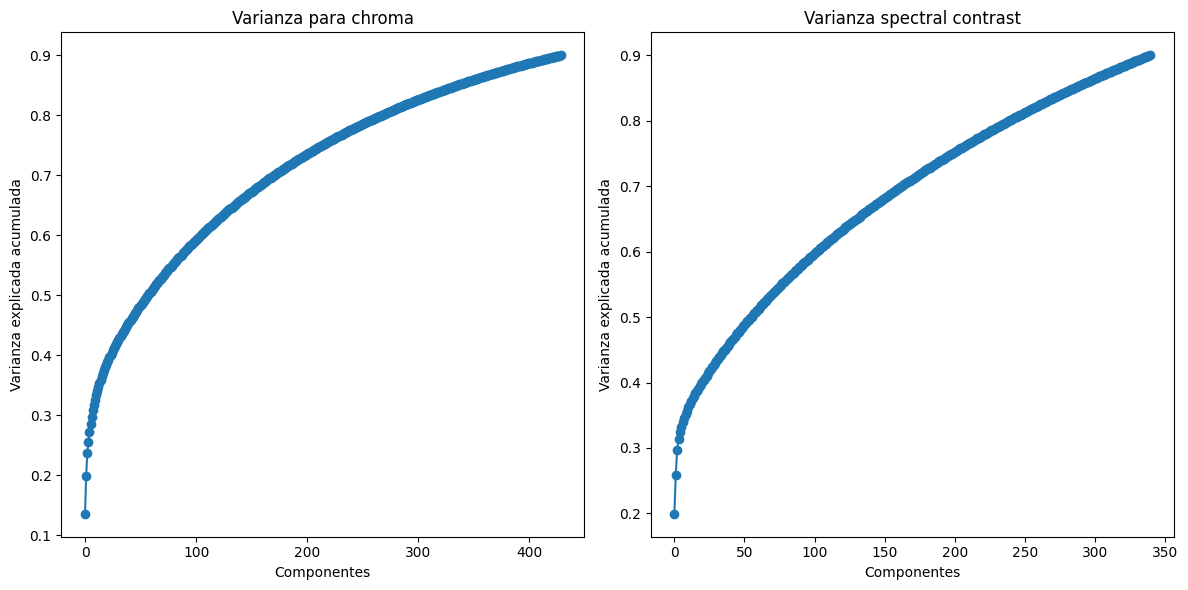

In [51]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.cumsum(pca_c3.explained_variance_ratio_), "-o")
plt.title("Varianza para chroma")
plt.xlabel('Componentes')
plt.ylabel('Varianza explicada acumulada')

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca_c4.explained_variance_ratio_), "-o")
plt.title("Varianza spectral contrast")
plt.xlabel('Componentes')
plt.ylabel('Varianza explicada acumulada')

plt.tight_layout()
plt.show()

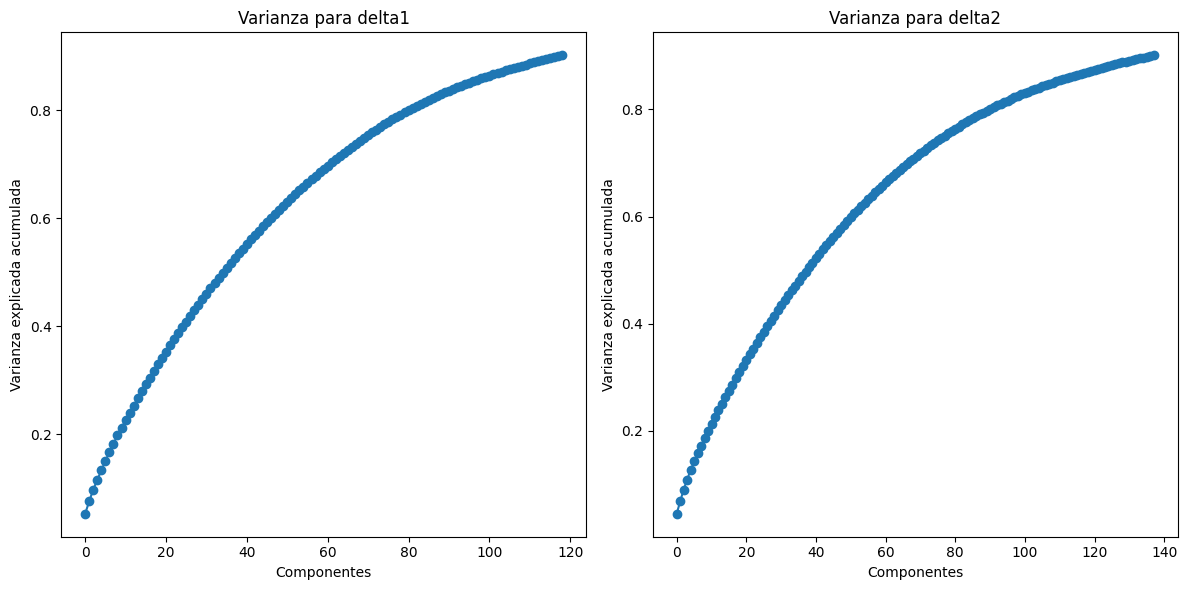

In [52]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.cumsum(pca_c5.explained_variance_ratio_), "-o")
plt.title("Varianza para delta1")
plt.xlabel('Componentes')
plt.ylabel('Varianza explicada acumulada')

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca_c6.explained_variance_ratio_), "-o")
plt.title("Varianza para delta2")
plt.xlabel('Componentes')
plt.ylabel('Varianza explicada acumulada')

plt.tight_layout()
plt.show()

## Agrupación de features

In [18]:
#mfccc + mel
train_mfccmel = np.hstack((train_c1_pca, train_c2_pca))

In [19]:
train_mfccmel.shape

(10934, 306)

In [20]:
import numpy as np
#mfcc
train_mfcc = train_c1_pca
test_mfcc = test_c1_pca

#mfccc + mel
train_mfccmel
test_mfccmel = np.hstack((test_c1_pca, test_c2_pca))

#mfcc + mel + delta1 + delta2
train_mfccmeldelta1delta2 = np.hstack((train_c1_pca, train_c2_pca, train_c5_pca, train_c6_pca))
test_mfccmeldelta1delta2 = np.hstack((test_c1_pca, test_c2_pca, test_c5_pca, test_c6_pca))

#mfcc + mel + delta1 + delta2 + spectral contrast
train_mfccmeldelta1delta2spectral = np.hstack((train_c1_pca, train_c2_pca, train_c5_pca, train_c6_pca, train_c4_pca))
test_mfccmeldelta1delta2spectral = np.hstack((test_c1_pca, test_c2_pca, test_c5_pca, test_c6_pca, test_c4_pca))

## KNN Mayority Vote

In [21]:
import numpy as np
from sklearn.neighbors import KDTree
from collections import Counter

# Clase KNN implementada con KDTree
class KNN_mv:
    def __init__(self, k=3):
        self.k = k

    # Entrenar el modelo: construimos el KDTree con los datos de entrenamiento
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.tree = KDTree(X_train)  # Construir el KDTree para los datos

    # Predecir la clase para un conjunto de prueba
    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    # Predecir la clase para un único punto
    def _predict(self, x):
        # Usar KDTree para encontrar los índices de los k vecinos más cercanos
        distances, k_indices = self.tree.query([x], k=self.k)

        # Obtener las etiquetas correspondientes a los k vecinos más cercanos
        k_nearest_labels = [self.y_train[i] for i in k_indices[0]]

        # Clasificación por mayoría: la clase que más se repita entre los k vecinos
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


## KNN Maximo Peso de Distancias

In [86]:
from sklearn.neighbors import KDTree
from collections import Counter
import numpy as np

class KNN_mw:
    def __init__(self, k=3, epsilon=1e-5):
        self.k = k
        self.epsilon = epsilon  # Para evitar divisiones por cero

    # Fase de entrenamiento: Construir el KDTree con los datos de entrenamiento
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.tree = KDTree(X_train)  # Crear el KDTree para acelerar las búsquedas

    # Predecir las clases para un conjunto de prueba
    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    # Predicción para un único punto
    def _predict(self, x):
        # Usar KDTree para encontrar los índices y distancias de los k vecinos más cercanos
        distances, k_indices = self.tree.query([x], k=self.k)

        # Obtener las etiquetas correspondientes a los k vecinos
        k_nearest_labels = [self.y_train[i] for i in k_indices[0]]

        # Calcular los pesos inversos a las distancias
        weights = [1 / (dist + self.epsilon) for dist in distances[0]]

        # Crear un diccionario de clases y sumar los pesos correspondientes a cada clase
        class_weights = {}
        for label, weight in zip(k_nearest_labels, weights):
            if label in class_weights:
                class_weights[label] += weight
            else:
                class_weights[label] = weight

        # Seleccionar la clase con el peso total más alto
        predicted_class = max(class_weights, key=class_weights.get)
        return predicted_class

## Fit y predict con data agrupada

In [22]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
#mfcc + mel
nn = KNN_mv(5)
nn.fit(train_mfccmel, y_train_labels)
y_pred_1 = nn.predict(test_mfccmel)

In [24]:
#mfcc + mel + delta1 + delta2
nn = KNN_mv(5)
nn.fit(train_mfccmeldelta1delta2, y_train_labels)
y_pred_2 = nn.predict(test_mfccmeldelta1delta2)

In [25]:
#mfcc + mel + delta1 + delta2 + spectral contrast
nn = KNN_mv(5)
nn.fit(train_mfccmeldelta1delta2spectral, y_train_labels)
y_pred_3 = nn.predict(test_mfccmeldelta1delta2spectral)

In [26]:
all_ft = np.hstack((train_c1_pca, train_c2_pca, train_c3_pca, train_c4_pca, train_c5_pca, train_c6_pca))
all_ft_t = np.hstack((test_c1_pca, test_c2_pca, test_c3_pca, test_c4_pca, test_c5_pca, test_c6_pca))
# all
nn = KNN_mv(5)
nn.fit(all_ft, y_train_labels)
y_pred_all = nn.predict(all_ft_t)

## Fit y predict con data individual

In [27]:
#mfcc
nn = KNN_mv(5)
nn.fit(train_mfcc, y_train_labels)
y_pred_4 = nn.predict(test_mfcc)

In [28]:
# mel
nn = KNN_mv(5)
nn.fit(train_c2_pca, y_train_labels)
y_pred_5 = nn.predict(test_c2_pca)

In [29]:
# chroma
nn = KNN_mv(5)
nn.fit(train_c3_pca, y_train_labels)
y_pred_6 = nn.predict(test_c3_pca)

In [30]:
# spectral
nn = KNN_mv(5)
nn.fit(train_c4_pca, y_train_labels)
y_pred_7 = nn.predict(test_c4_pca)

In [31]:
# delta1
nn = KNN_mv(5)
nn.fit(train_c5_pca, y_train_labels)
y_pred_8 = nn.predict(test_c5_pca)

In [32]:
# delta2
nn = KNN_mv(5)
nn.fit(train_c6_pca, y_train_labels)
y_pred_9 = nn.predict(test_c6_pca)

## Decodificado, conversión y guardado para probarlo en kaggle

In [33]:
# Lista con los resultados de las predicciones
y_preds = [y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5, y_pred_6, y_pred_7, y_pred_8, y_pred_9]

for i, y_pred in enumerate(y_preds, start=1):
    # Decodificar las etiquetas
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    # Crear un DataFrame
    df = pd.DataFrame({'class': y_pred_decoded})
    # Guardar en un archivo CSV
    filename = f'y_pred_{i}.csv'
    df.to_csv(filename, index_label='idx')

In [34]:
print("mfcc+mel", y_pred_1.shape, "y_pred_1")
print("mfcc+mel+delta1+delta2", y_pred_2.shape,"y_pred_2")
print("mfcc+mel+delta1+delta2+spectral", y_pred_3.shape,"y_pred_3")
print("mfcc", y_pred_4.shape,"y_pred_4")
print("mel", y_pred_5.shape,"y_pred_5")
print("chroma", y_pred_6.shape,"y_pred_6")
print("spectral", y_pred_7.shape,"y_pred_7")
print("delta1", y_pred_8.shape,"y_pred_8")
print("delta2", y_pred_9.shape,"y_pred_9")

mfcc+mel (1962,) y_pred_1
mfcc+mel+delta1+delta2 (1962,) y_pred_2
mfcc+mel+delta1+delta2+spectral (1962,) y_pred_3
mfcc (1962,) y_pred_4
mel (1962,) y_pred_5
chroma (1962,) y_pred_6
spectral (1962,) y_pred_7
delta1 (1962,) y_pred_8
delta2 (1962,) y_pred_9


In [35]:
y_pred_all = label_encoder.inverse_transform(y_pred_all)
df = pd.DataFrame({'class': y_pred_all})
df.to_csv('y_pred_all.csv', index_label='idx')

## K-Fold

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import pandas as pd
import matplotlib.pyplot as plt
# Función para hacer la validación cruzada y calcular Precision, Recall, F1-Score
def cross_val_metrics_knn(knn, X, y, k_folds=10):
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Almacenamos las métricas para cada fold
    metrics = {'Fold': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

    fold_num = 1
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Insertar datos al KDTree y calcular las labels
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        # Calcular Precision, Recall y F1-Score
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Guardar los resultados en la tabla
        metrics['Fold'].append(fold_num)
        metrics['Precision'].append(precision)
        metrics['Recall'].append(recall)
        metrics['F1-Score'].append(f1)

        fold_num += 1

    return pd.DataFrame(metrics)


Resultados para Dataset 1:

Resultados para K=5:
   Fold  Precision    Recall  F1-Score
0     1   0.482631  0.481481  0.481345
1     2   0.502154  0.502058  0.502030
2     3   0.492567  0.492455  0.492442
3     4   0.505032  0.505258  0.505050
4     5   0.517062  0.516926  0.516550

Resultados para K=7:
   Fold  Precision    Recall  F1-Score
0     1   0.500414  0.498857  0.498415
1     2   0.489371  0.489255  0.489187
2     3   0.487570  0.487426  0.487373
3     4   0.499368  0.499314  0.499336
4     5   0.516566  0.516468  0.516236

Resultados para K=9:
   Fold  Precision    Recall  F1-Score
0     1   0.509906  0.508459  0.508180
1     2   0.497105  0.497028  0.497016
2     3   0.475219  0.475080  0.475021
3     4   0.495892  0.496113  0.495921
4     5   0.511049  0.510979  0.510816

Resultados para Dataset 2:

Resultados para K=5:
   Fold  Precision    Recall  F1-Score
0     1   0.489839  0.488797  0.488758
1     2   0.512988  0.513032  0.512992
2     3   0.501688  0.501600  0.50160

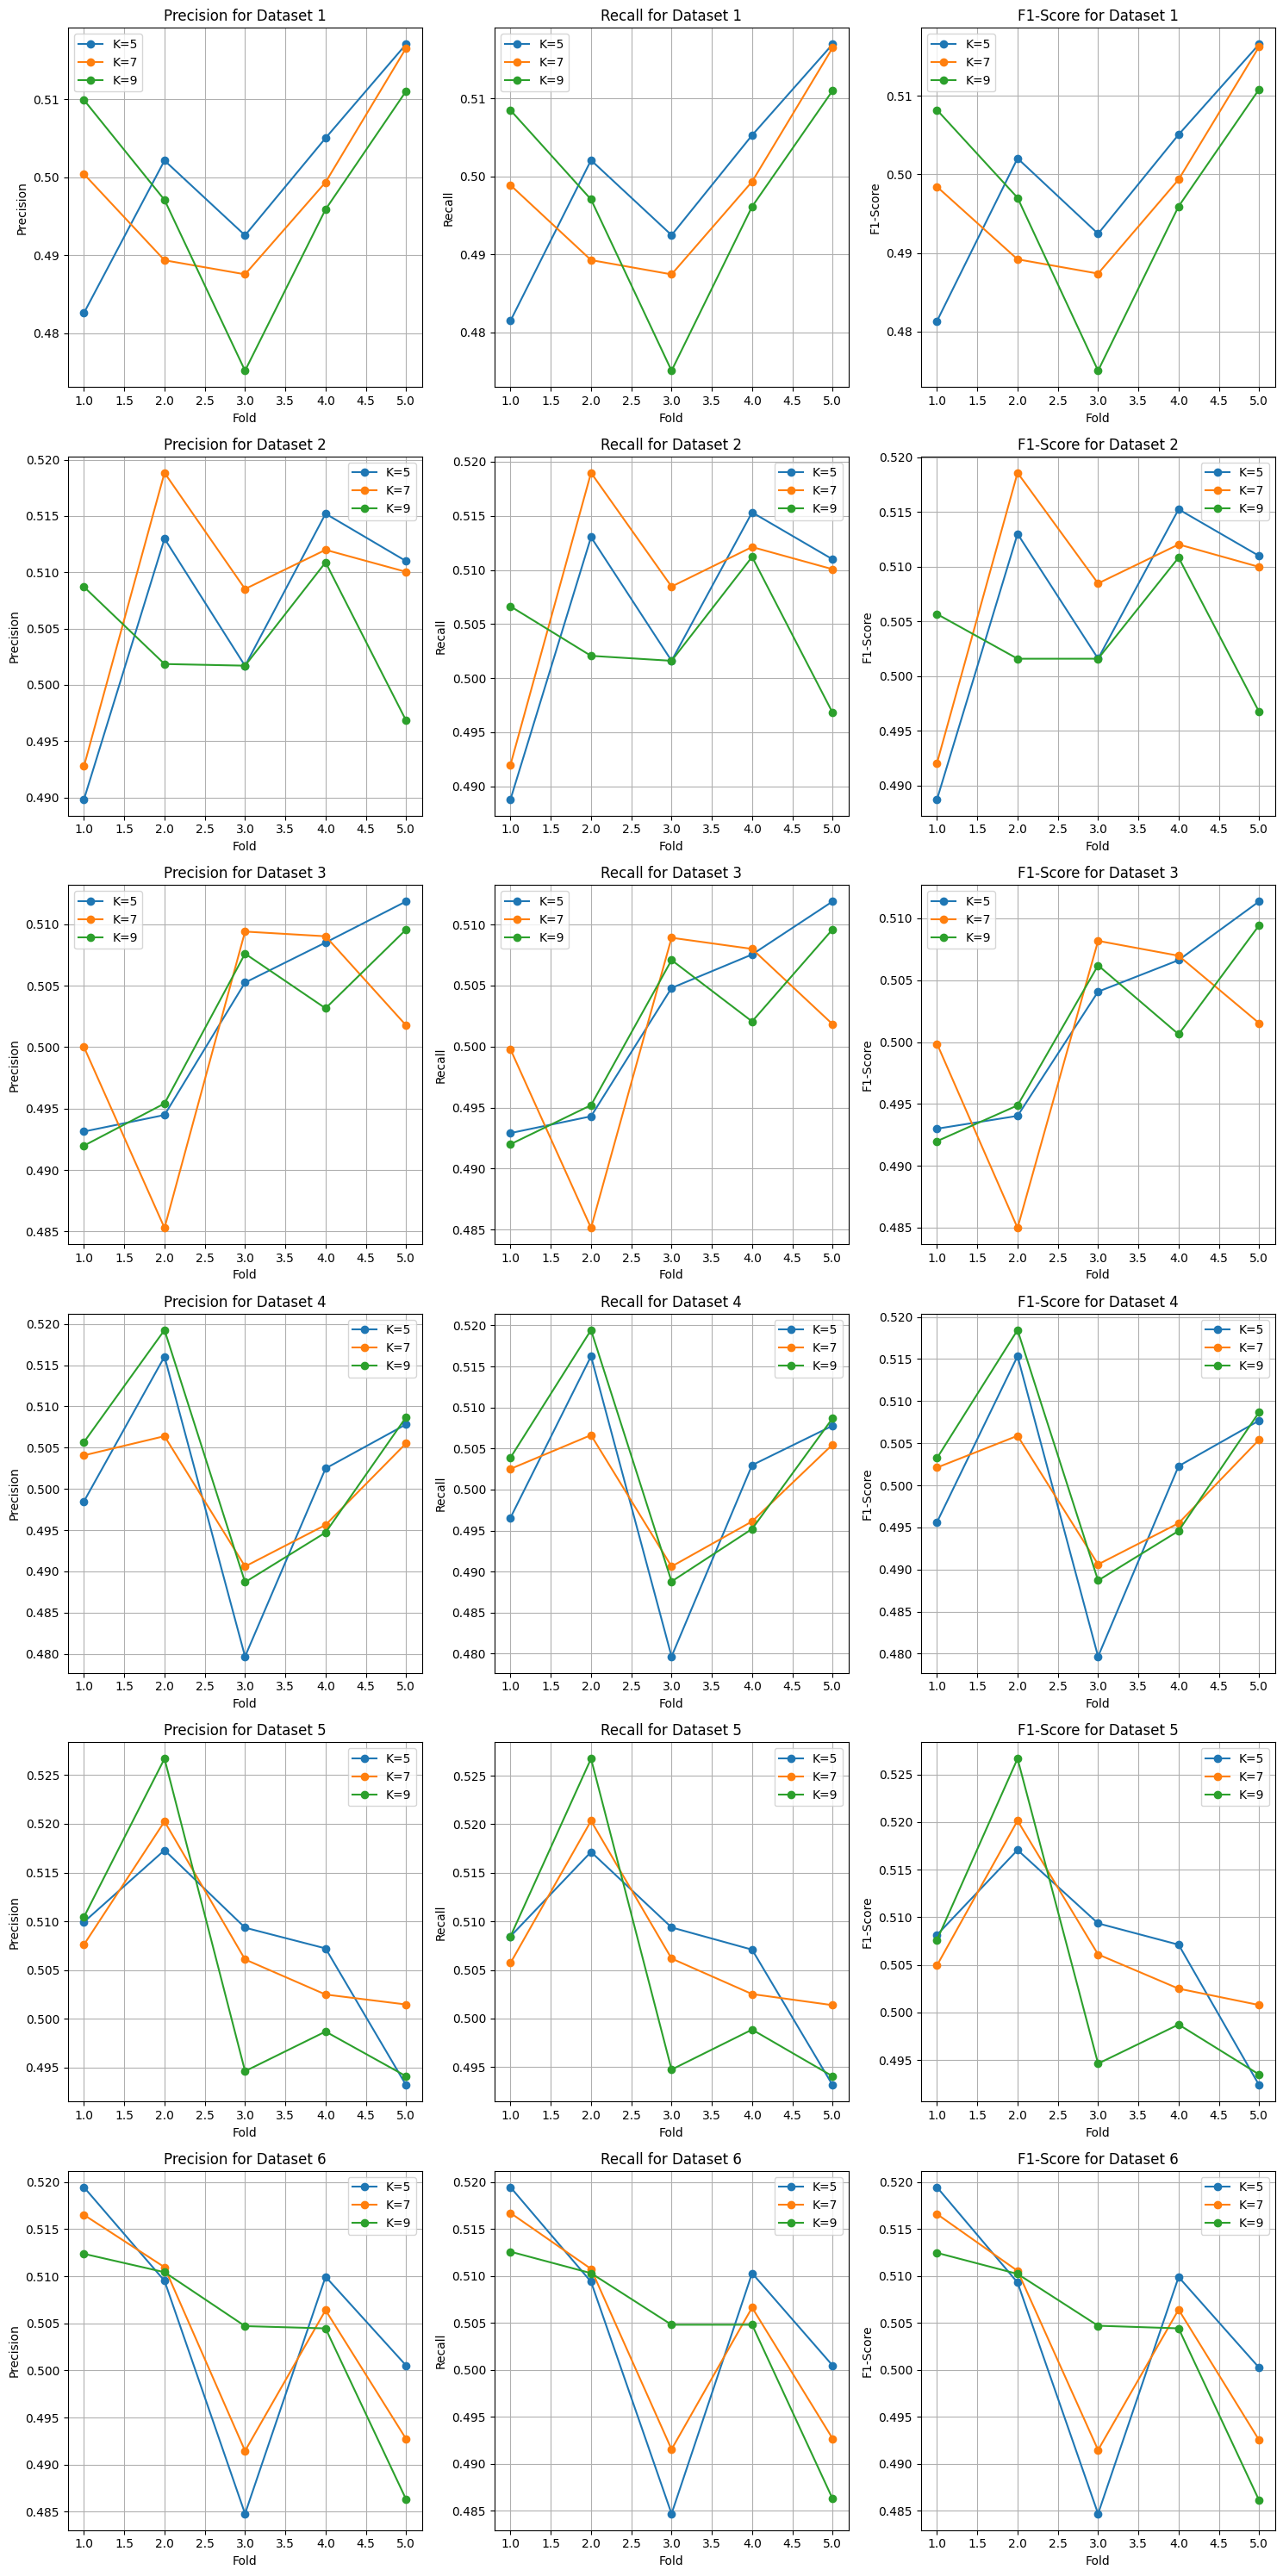

In [39]:
# Lista de datasets de las features con diferentes técnicas de extracción
datasets = [
    train_c1_pca, train_c2_pca, train_c3_pca, train_c4_pca, train_c5_pca,
    train_c6_pca]

# Diccionario para almacenar resultados
results = {}

# Probamos diferentes valores de K
for dataset_idx, dataset in enumerate(datasets):
    dataset_name = f"Dataset {dataset_idx + 1}"
    results[dataset_name] = {}

    for k in [5, 7, 9]:
        knn = KNN_mv(k=k)
        metrics_df = cross_val_metrics_knn(knn, dataset, y_train_labels, k_folds=5)
        results[dataset_name][f'K={k}'] = metrics_df

# Mostrar los resultados para cada dataset y cada K
for dataset_name, k_results in results.items():
    print(f"\nResultados para {dataset_name}:")
    for k, metrics_df in k_results.items():
        print(f"\nResultados para {k}:")
        print(metrics_df)


# Función para graficar las métricas por fold para todos los datasets
def plot_metrics_by_fold(results):
    fig, axes = plt.subplots(len(datasets), 3, figsize=(15, 5 * len(datasets)))

    metrics = ['Precision', 'Recall', 'F1-Score']
    k_values = ['K=5', 'K=7', 'K=9']

    for dataset_idx, dataset_name in enumerate(results.keys()):
        for j, metric in enumerate(metrics):
            for k in k_values:
                axes[dataset_idx, j].plot(
                    results[dataset_name][k]['Fold'],
                    results[dataset_name][k][metric],
                    marker='o', label=k
                )
            axes[dataset_idx, j].set_title(f'{metric} for {dataset_name}')
            axes[dataset_idx, j].set_xlabel('Fold')
            axes[dataset_idx, j].set_ylabel(metric)
            axes[dataset_idx, j].grid(True)
            axes[dataset_idx, j].legend()

    plt.tight_layout()
    plt.show()

plot_metrics_by_fold(results)